# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/School/20211/AI/Project/data/emnist/emnist-balanced-train.csv.zip
# !unzip /content/drive/MyDrive/School/20211/AI/Project/data/emnist/emnist-balanced-test.csv.zip

Archive:  /content/drive/MyDrive/School/20211/AI/Project/data/emnist/emnist-balanced-train.csv.zip
  inflating: emnist-balanced-train.csv  
Archive:  /content/drive/MyDrive/School/20211/AI/Project/data/emnist/emnist-balanced-test.csv.zip
  inflating: emnist-balanced-test.csv  


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv("/content/drive/MyDrive/School/20211/AI/Project/data/emnist/emnist-balanced-test.csv/emnist-balanced-train.csv").astype('float32')
data_test = pd.read_csv("/content/drive/MyDrive/School/20211/AI/Project/data/emnist/emnist-balanced-test.csv/emnist-balanced-test.csv").astype('float32')

In [ ]:
data_train['45']

0         36.0
1         43.0
2         15.0
3          4.0
4         42.0
          ... 
112794    22.0
112795    17.0
112796    23.0
112797    31.0
112798     8.0
Name: 45, Length: 112799, dtype: float32

In [ ]:
data_train.rename(columns={'45':'label'}, inplace=True)
data_test.rename(columns={'41':'label'}, inplace=True)

In [ ]:
X_train = data_train.drop('label',axis = 1)
y_train = data_train['label']

X_test = data_test.drop('label',axis = 1)
y_test = data_test['label']

In [ ]:
label_map = pd.read_csv("/content/drive/MyDrive/School/20211/AI/Project/data/emnist/emnist-balanced-test.csv/emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)

In [ ]:
label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

In [ ]:
label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

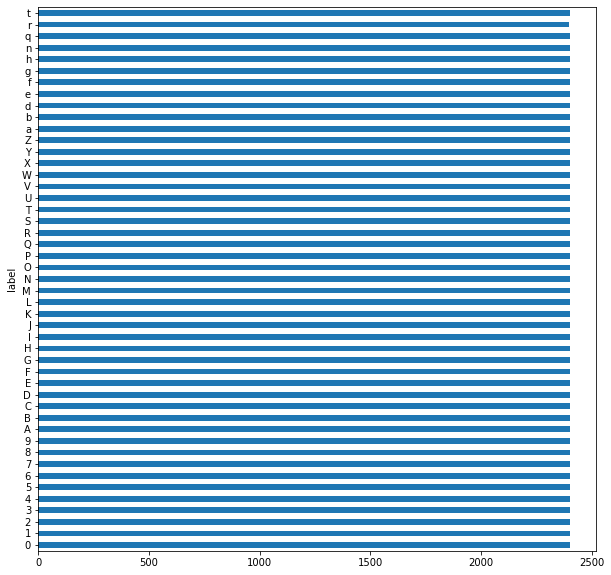

In [ ]:
data_train['label'] = data_train['label'].map(label_dictionary)
label_size = data_train.groupby('label').size()
label_size.plot.barh(figsize=(10,10))

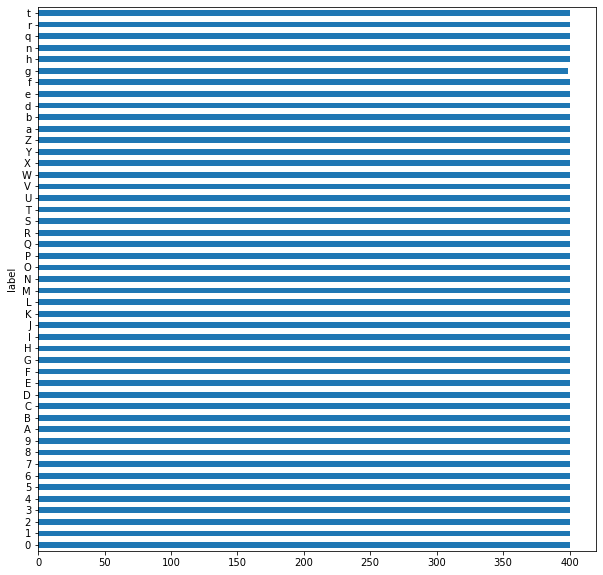

In [ ]:
data_test['label'] = data_test['label'].map(label_dictionary)
label_size = data_test.groupby('label').size()
label_size.plot.barh(figsize=(10,10))

In [ ]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Y_train = np_utils.to_categorical([int(x) for x in y_train], 47)
Y_test = np_utils.to_categorical([int(x) for x in y_test], 47)

In [ ]:
X_train = X_train/255.
X_test = X_test/255.

In [ ]:
import cv2 
import os 
import sys 
import numpy as np 
from sklearn.model_selection import train_test_split 
import tensorflow as tf 
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout, ReLU
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity 
from matplotlib.pyplot import imshow 
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import mnist 
from sklearn.utils import shuffle

In [ ]:
def Model_01(input_shape = (28, 28, 1), classes = 47):
    X_input = Input(input_shape) 

    X = Conv2D(filters = 16, kernel_size=(3,3), strides= (1,1))(X_input)
    # for i in range(16): 
    X = ReLU()(X) 
    X = MaxPooling2D(pool_size=(2,2), strides = 2)(X) 
    X = Conv2D(filters= 32, kernel_size=(5,5), strides= (1,1))(X) 
    # for i in range(32): 
    X = ReLU()(X) 
    X = MaxPooling2D(pool_size=(2,2), strides = 2)(X) 
    
    X = Conv2D(filters= 64, kernel_size=(3,3), strides= (1,1))(X)
    X = Flatten()(X) 
    X = Dense(128, activation='relu')(X)
    X = Dropout(0.3)(X)
    X = Dense(128, activation='relu')(X) 

    X = Dense(classes, activation='softmax', kernel_initializer=glorot_uniform())(X)

    model = Model(inputs = X_input, outputs = X) 

    return model 

In [ ]:
model = Model_01()
model.compile(optimizer="adam", loss= "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 re_lu_6 (ReLU)              (None, 26, 26, 16)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 32)          12832     
                                                                 
 re_lu_7 (ReLU)              (None, 9, 9, 32)          0         
                                                           

In [ ]:
H = model.fit(X_train, Y_train, validation_split=0.1, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
3173/3173 [==============================] - 72s 22ms/step - loss: 0.8934 - accuracy: 0.7197 - val_loss: 0.4898 - val_accuracy: 0.8298
Epoch 2/10
3173/3173 [==============================] - 70s 22ms/step - loss: 0.5191 - accuracy: 0.8213 - val_loss: 0.4209 - val_accuracy: 0.8491
Epoch 3/10
3173/3173 [==============================] - 70s 22ms/step - loss: 0.4579 - accuracy: 0.8406 - val_loss: 0.4096 - val_accuracy: 0.8462
Epoch 4/10
3173/3173 [==============================] - 70s 22ms/step - loss: 0.4268 - accuracy: 0.8502 - val_loss: 0.3913 - val_accuracy: 0.8572
Epoch 5/10
3173/3173 [==============================] - 70s 22ms/step - loss: 0.4057 - accuracy: 0.8566 - val_loss: 0.3738 - val_accuracy: 0.8614
Epoch 6/10
3173/3173 [==============================] - 70s 22ms/step - loss: 0.3874 - accuracy: 0.8607 - val_loss: 0.3869 - val_accuracy: 0.8586
Epoch 7/10
3173/3173 [==============================] - 70s 22ms/step - loss: 0.3758 - accuracy: 0.8641 - val_loss: 0.3678 -

In [ ]:
model.save('model01_tanminh_chia255_codropout.h5')
model.save_weights('weights_model01_tanminh_chia255_codropout.h5')
np.save('history_model01_tanminh_chia255_codropout.npy',H.history)

In [ ]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']
epochs = range(1,len(acc)+1)

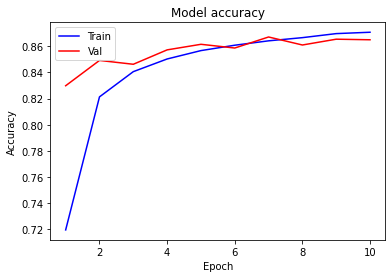

In [ ]:
plotgraph(epochs, acc, val_acc)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)

588/588 [==============================] - 5s 8ms/step - loss: 0.3695 - accuracy: 0.8722
